In [5]:
#fixing damaged images
import numpy as np
import cv2

# Open the image.
img = cv2.imread('cat_damaged.png')

# Load the mask.
mask = cv2.imread('cat_mask.png', 0)

# Inpaint.
dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)

# Write the output.
cv2.imwrite('cat_inpainted.png', dst)
cv2.imshow('cat_inpainted.png', dst)
cv2.waitKey(0)

-1

In [3]:
#frame
import cv2
import numpy as np
from skimage import io      # Only needed for web grabbing images; use cv2.imread(...) for local images

# Read images
frame = cv2.cvtColor(io.imread('crop.png'), cv2.COLOR_RGB2BGR)
image = cv2.cvtColor(io.imread('rose.jpg'), cv2.COLOR_RGB2BGR)

# Color threshold red frame; single color here, more sophisticated solution would be using cv2.inRange
mask = 255 * np.uint8(np.all(frame == [36, 28, 237], axis=2))

# Find inner contour of frame; get coordinates
contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnt = min(contours, key=cv2.contourArea)
(x, y, w, h) = cv2.boundingRect(cnt)

# Copy appropriately resized image to frame
frame[y:y+h, x:x+w] = cv2.resize(image, (w, h))

cv2.imshow('frame', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

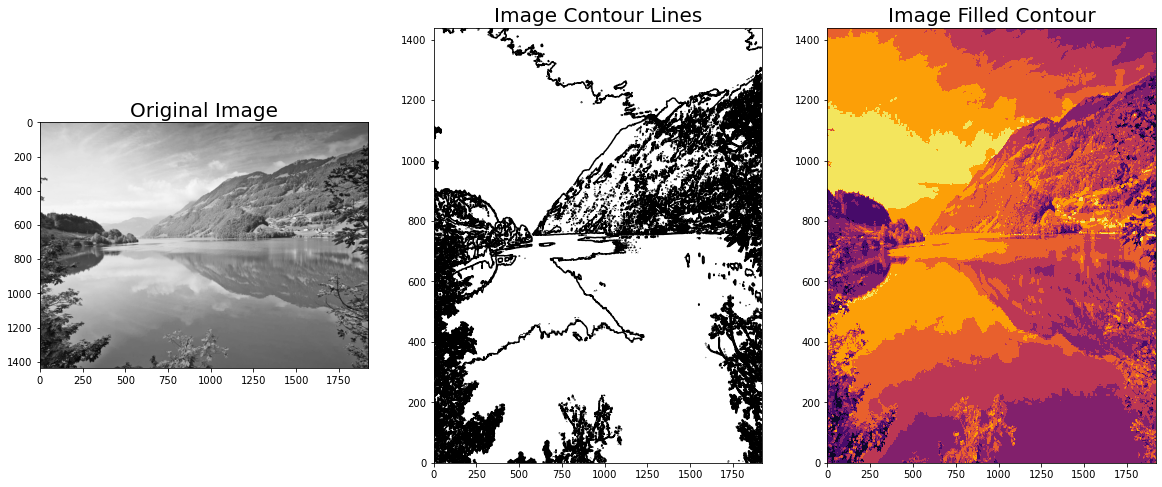

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
import cv2
import imageio
from imageio import imread
im = rgb2gray(imread("nature.jpg")) # read the image from disk as a numpy ndarray
plt.figure(figsize=(20,8))
plt.subplot(131), plt.imshow(im, cmap='gray'), plt.title('Original Image',size=20)
plt.subplot(132), plt.contour(np.flipud(im), colors='k',levels=np.logspace(-15, 15, 100))
plt.title('Image Contour Lines', size=20)
plt.subplot(133), plt.title('Image Filled Contour',size=20),
plt.contourf(np.flipud(im), cmap='inferno')
plt.show()
